<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [44]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
a=pd.read_csv("csvfiles/income1.csv")

In [46]:
a.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


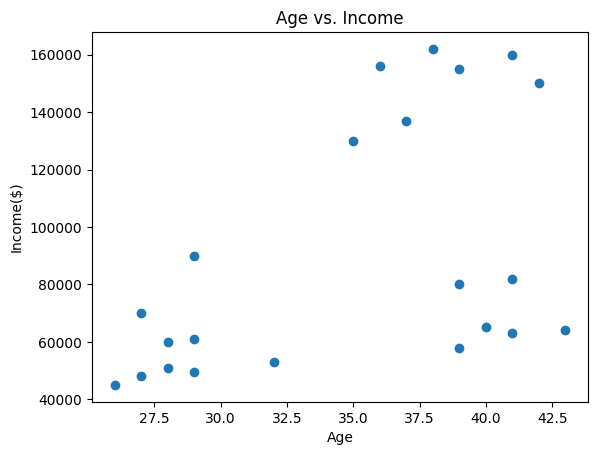

In [47]:
plt.scatter(a["Age"], a["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.title("Age vs. Income")
plt.show()

In [48]:
km =KMeans(n_clusters=3,n_init=10)
km


KMeans(n_clusters=3, n_init=10)

In [49]:
y=km.fit_predict(a[['Age','Income($)']])

In [50]:
a["clustter"]=y

In [51]:
a.head()

,Name,Age,Income($),clustter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [52]:
a1=a[a.clustter==0]
a2=a[a.clustter==1]
a3=a[a.clustter==2]

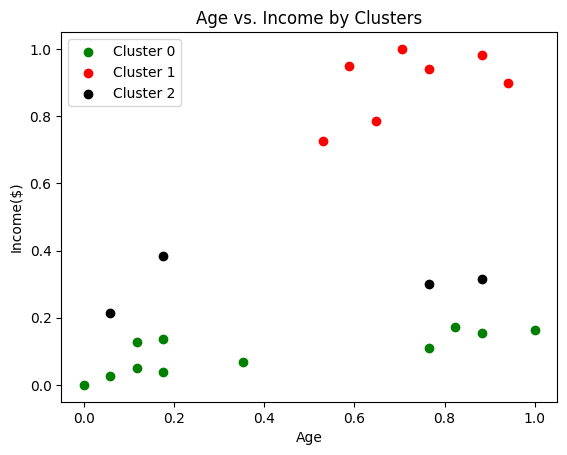

In [56]:
import matplotlib.pyplot as plt

a1 = a[a['clustter'] == 0]
a2 = a[a['clustter'] == 1]
a3 = a[a['clustter'] == 2]

plt.scatter(a1['Age'], a1['Income($)'], color='green', label='Cluster 0')
plt.scatter(a2['Age'], a2['Income($)'], color='red', label='Cluster 1')
plt.scatter(a3['Age'], a3['Income($)'], color='black', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs. Income by Clusters')
plt.legend()
plt.show()


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(a[["Income($)"]])
a["Income($)"] = scaler.transform(a[["Income($)"]])
scaler.fit(a[["Age"]])
a["Age"] = scaler.transform(a[["Age"]])


In [55]:
a


,Name,Age,Income($),clustter
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [59]:
km = KMeans(n_clusters=3,n_init=10)
y_predicted = km.fit_predict(a[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [60]:
a['cluster']=y_predicted
a.head()

,Name,Age,Income($),clustter,cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [64]:
a.drop("clustter", axis=1, inplace=True)


In [65]:
a

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


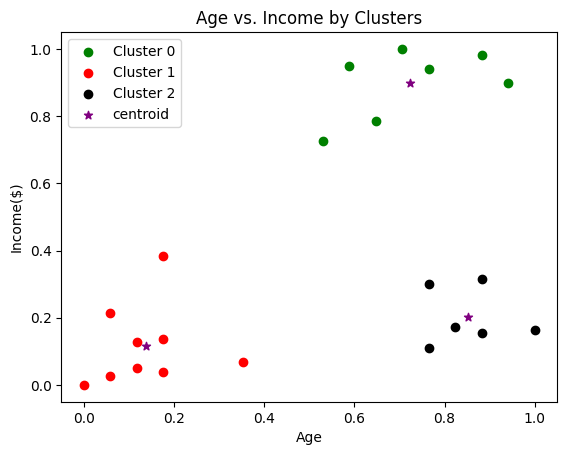

In [73]:
import matplotlib.pyplot as plt

a1 = a[a['cluster'] == 0]
a2 = a[a['cluster'] == 1]
a3 = a[a['cluster'] == 2]

plt.scatter(a1['Age'], a1['Income($)'], color='green', label='Cluster 0')
plt.scatter(a2['Age'], a2['Income($)'], color='red', label='Cluster 1')
plt.scatter(a3['Age'], a3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs. Income by Clusters')
plt.legend()
plt.show()


In [68]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

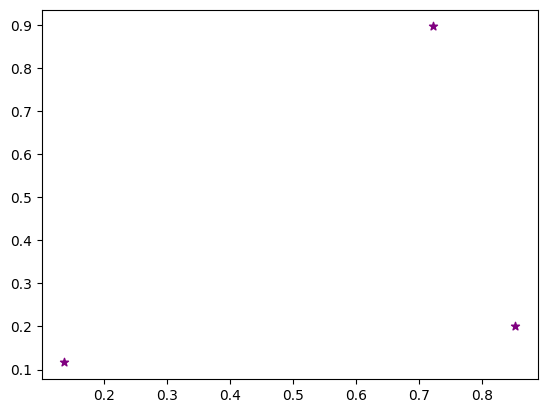

In [75]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

<h4 style='color:purple'>Elbow Plot</h4>

In [79]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(a[['Age','Income($)']])
    sse.append(km.inertia_)

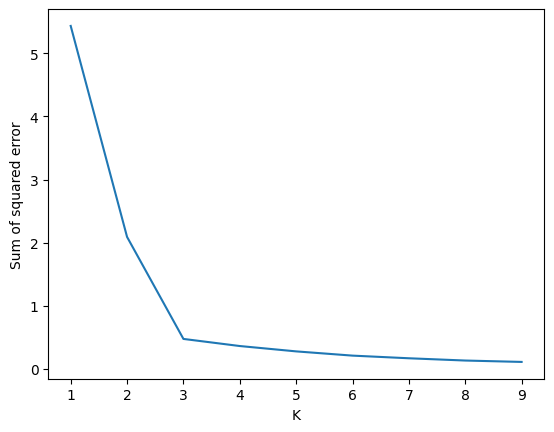

In [80]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [81]:
sse

[5.434011511988179,
 2.091136388699078,
 0.47507834985530956,
 0.3625079900797329,
 0.2776818715436999,
 0.21055478995472499,
 0.1685851223602976,
 0.13265419827245162,
 0.11073569527418642]

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [83]:
from sklearn.datasets import load_iris
iris = load_iris()

In [95]:
b = pd.DataFrame(iris.data,columns=iris.feature_names)
b.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
b['flower'] = iris.target
b.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
b.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [98]:
b.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [99]:
kd = KMeans(n_clusters=3,n_init=3)
y = kd.fit_predict(b)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [100]:
b['cluster'] = y
b.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0


In [101]:
b.cluster.unique()

array([0, 1, 2], dtype=int32)

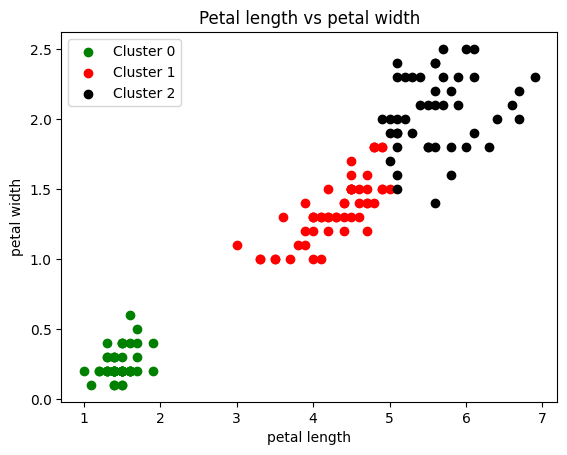

In [107]:
import matplotlib.pyplot as plt

b1 = b[b['cluster'] == 0]
b2 = b[b['cluster'] == 1]
b3 = b[b['cluster'] == 2]

plt.scatter(b1['petal length (cm)'],b1['petal width (cm)'], color='green', label='Cluster 0')
plt.scatter(b2['petal length (cm)'],b2['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(b3['petal length (cm)'],b3['petal width (cm)'], color='black', label='Cluster 2')

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal length vs petal width')
plt.legend()
plt.show()


In [114]:
sse1 = []
k_rng = range(1,10)
for k in k_rng:
    kd = KMeans(n_clusters=k,n_init=k)
    kd.fit(b)
    sse1.append(kd.inertia_)

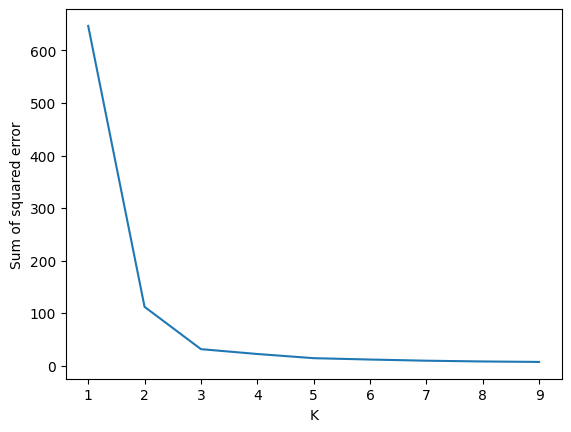

In [115]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse1)